In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from numpy.random import seed
sns.set()

In [2]:
restaurantdf=pd.read_csv('yelp_dataset/restaurantCategoriesEthnicity.csv',encoding = "utf-8-sig")

In [3]:
#CSV with just business ID and category dummy variable information. 
categories=pd.read_csv('yelp_dataset/categories.csv',encoding = "utf-8-sig")

In [23]:
# date_checkin=pd.read_csv('yelp_dataset/date_checkin.csv', encoding="utf-8-sig") 

In [40]:
restaurantdf.head()

,business_id,name,city,state,date,Afghan,African,American (New),American (Traditional),Arabian,...,Tonkatsu,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros,racial
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,"2010-07-05 16:56:31, 2010-12-21 20:30:01, 2010...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asian
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,"2010-11-13 01:00:36, 2010-12-19 00:49:15, 2011...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asian
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,AZ,"2010-07-20 22:03:12, 2010-07-26 19:51:14, 2011...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hispanic
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,Mentor-on-the-Lake,OH,"2010-09-26 23:14:40, 2010-09-27 01:36:58, 2012...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White
4,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,NV,"2010-03-05 03:54:37, 2010-07-15 03:43:42, 2010...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,White


In [79]:
np.random.seed(50)
N_rep = 5000

# set up an empty array
bs_replicates_white = np.empty(N_rep)
bs_replicates_black = np.empty(N_rep)
bs_replicates_ai = np.empty(N_rep)
bs_replicates_asian = np.empty(N_rep)
bs_replicates_pi = np.empty(N_rep)
bs_replicates_hispanic = np.empty(N_rep)
bs_replicates_notw = np.empty(N_rep)

#for each row in the empty array, take a sample and add it to the array
for i in range(N_rep):
    bs_sample = np.random.choice(restaurantdf.racial, size=len(restaurantdf.racial))
    df=pd.DataFrame(bs_sample)
    
    bs_replicates_white[i] = df[0].value_counts()['White']
    bs_replicates_black[i] = df[0].value_counts()['Black']
    bs_replicates_ai[i] = df[0].value_counts()['American Indian']
    bs_replicates_asian[i] = df[0].value_counts()['Asian']
    bs_replicates_pi[i] = df[0].value_counts()['Pacific Islander']
    bs_replicates_hispanic[i] = df[0].value_counts()['Hispanic']
    bs_replicates_notw[i] = df[0][df[0]!='White'].count()

In [80]:
bs_replicates={}
bs_replicates['White']=bs_replicates_white
bs_replicates['Black']=bs_replicates_black
bs_replicates['American Indian']=bs_replicates_ai
bs_replicates['Asian']=bs_replicates_asian
bs_replicates['Pacific Islander']=bs_replicates_pi
bs_replicates['Hispanic']=bs_replicates_hispanic
bs_replicates['Foreign']=bs_replicates_notw

In [81]:
bs_replicates['Foreign']

array([18183., 18448., 18590., ..., 18333., 18456., 18441.])

In [82]:
for key in bs_replicates:
    #95% confidence interval lower limit
    lower = np.percentile(bs_replicates[key],5)
    print("The lower limit of the 95% confidence interval for {0} is {1:.0f}".format(key,lower))

The lower limit of the 95% confidence interval for White is 17769
The lower limit of the 95% confidence interval for Black is 1633
The lower limit of the 95% confidence interval for American Indian is 623
The lower limit of the 95% confidence interval for Asian is 10579
The lower limit of the 95% confidence interval for Pacific Islander is 433
The lower limit of the 95% confidence interval for Hispanic is 4757
The lower limit of the 95% confidence interval for Foreign is 18246


The vastly different counts between the bootstrapped replicates of ethnic restaurants clearly indicates how much influence certain ethnicities like Asian ethnicities have, but this is only about as good as a population count. But a look at white vs foreign ethnic restauraunts combined is similar. A look at whether the true standard deviation would reveal if foreign restaurants are as or more influential.

Null hypothesis: there is no difference in means between domestic and foreign ethnic restaurants

Alternative hypothesis: there is a difference in means between domestic and foreign ethnic restaurants

In [90]:
def bs_mean(data, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Take samples from the dataset
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = np.mean(bs_sample)

    return bs_replicates

In [107]:
bs_diff_mean = bs_mean(bs_replicates['White'], size=10000)-bs_mean(bs_replicates['Foreign'], size=10000)

In [108]:
conf_95 = np.percentile(bs_diff_mean,[2.5, 97.5])
mean_mean_diff= bs_diff_mean.mean()

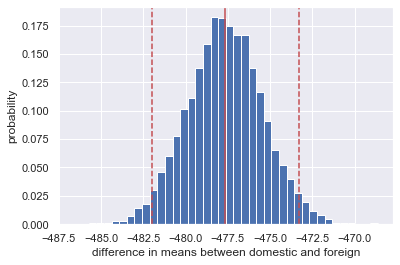

In [109]:
_ = plt.hist(bs_diff_mean, density=True, bins = 40)
_ = plt.xlabel('difference in means between domestic and foreign')
_ = plt.ylabel('probability')
_ = plt.axvline(mean_mean_diff, color='r')
_ = plt.axvline(conf_95[0], color='r', linestyle='--')
_ = plt.axvline(conf_95[1], color='r', linestyle='--')

With a zero being outside of the 95% confidence interval, we will have to reject the null hypothesis that there is no difference in the means of domestic and foreign foods. What this implies is that foreign restaurants and by proxy foreign culture have a stronger presence than domestic culture in the US and Canada where the dataset is taken from.

In [83]:
def bs_stdev(data, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Take samples from the dataset
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = np.std(bs_sample)

    return bs_replicates

In [84]:
bs_stdev(bs_replicates['Foreign'], size=10000)

array([110.92219912, 109.97907888, 114.30805057, ..., 110.91788102,
       112.80645938, 111.91775109])

In [118]:
bs_diff_stdev = bs_stdev(bs_replicates['White'], size=10000) - bs_stdev(bs_replicates['Foreign'], size=10000)

In [119]:
conf_95 = np.percentile(bs_diff_stdev,[2.5, 97.5])
mean_stdev_diff= np.mean(bs_diff_stdev)

print("The mean of the differences is {:.2f}".format(mean_stdev_diff))
print("The lower bound of the 95% confidence interval that there is a difference is {0:.2f} \nThe upper bound of the 95% confidence interval that there is a difference is {1:.2f}".format(conf_95[0],conf_95[1]))

The mean of the differences is -0.92
The lower bound of the 95% confidence interval that there is a difference is -4.04 
The upper bound of the 95% confidence interval that there is a difference is 2.20


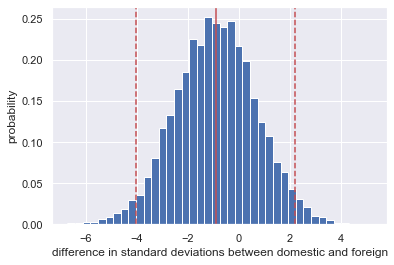

In [120]:
_ = plt.hist(bs_diff_stdev , density=True, bins = 40)
_ = plt.xlabel('difference in standard deviations between domestic and foreign')
_ = plt.ylabel('probability')
_ = plt.axvline(mean_stdev_diff, color='r')
_ = plt.axvline(conf_95[0], color='r', linestyle='--')
_ = plt.axvline(conf_95[1], color='r', linestyle='--')

In [ ]:
np.random.seed(50)
N_rep = 1000
n2_rep= 50

# set up an empty array
bs_replicates_white = np.empty(N_rep)
bs_replicates_black = np.empty(N_rep)
bs_replicates_ai = np.empty(N_rep)
bs_replicates_asian = np.empty(N_rep)
bs_replicates_pi = np.empty(N_rep)
bs_replicates_hispanic = np.empty(N_rep)
bs_replicates_notw = np.empty(N_rep)

#for each row in the empty array, take a sample and add it to the array
for i in range(N_rep):
    sample_white = np.empty(N_rep)
    sample_black = np.empty(N_rep)
    sample_ai = np.empty(N_rep)
    sample_asian = np.empty(N_rep)
    sample_pi = np.empty(N_rep)
    sample_hispanic = np.empty(N_rep)
    sample_notw = np.empty(N_rep)
    
    for j in range(n2_rep):
        bs_sample = np.random.choice(restaurantdf.racial, size=len(restaurantdf.racial))
        df=pd.DataFrame(bs_sample)
        
        sample_white[i] = df[0].value_counts()['White']
        sample_black[i] = df[0].value_counts()['Black']
        sample_ai[i] = df[0].value_counts()['American Indian']
        sample_asian[i] = df[0].value_counts()['Asian']
        sample_pi[i] = df[0].value_counts()['Pacific Islander']
        sample_hispanic[i] = df[0].value_counts()['Hispanic']
        sample_notw[i] = df[0][df[0]!='White'].count()
    
    bs_replicates_white[i] = sample_white.mean()
    bs_replicates_black[i] = sample_black.mean()
    bs_replicates_ai[i] = sample_ai.mean()
    bs_replicates_asian[i] = sample_asian.mean()
    bs_replicates_pi[i] = sample_hispanic.mean()
    bs_replicates_hispanic[i] = sample_hispanic.mean()
    bs_replicates_notw[i] = sample_notw.mean()